# ANALYSIS OF INSURANCE CHARGES FOR MEDICAL COST

<a id='intro'></a>
## Introduction

This data set was obtained from Kaggle(See the link <a href = "https://www.kaggle.com/datasets/mirichoi0218/insurance"> here </a>).

The dataset describes factors that could influence Insurance charges in the US(northeast, northwest, southeast, southwest). 

The columns in this dataset includes: 

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

<a id='questions'></a>
## Questions to Answer from this Dataset. 

1. What impact does the different sex genders have on insurance charges? 
    - Do male pay higher charges than female? or vice-versa? and why?
2. How does BMI affect insurance charges?
    - Are people with low BMI charged high or less? or vice-versa?
3. Are smokers likely to pay more insurance charges?


In [107]:
#  import statements for all of the packages I plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette("flare")


<a id='wrangling'></a>
## Data Wrangling

### General Properties
In this section, we want to display, check and examine the general properties and structure of the data in our dataset and observe if there are abnormalies or cleaning processes that we might want to proceed with at the cleaning stage.

In [108]:
# Load data for inspection 
df = pd.read_csv("insurance.csv")

# Display the first five roles of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
# Display info the describe the datatypes and the shape of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
# to show the statistical properties of our data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [111]:
#checking for duplicates
df.duplicated(keep = "first").sum()


1

From the info above about our data we can observe the following:
- we have 1338 rows and 7 columns
- the datatypes corresponds to the correct datatype inputs of the data
- there are no missing values
- But with one duplicate value

### Data Cleaning
In this section we will clean the issues we found while examining the structure of our dataset. 

One of the issues we identifies was that our dataset has one duplicate,and we will proceed in dropping the duplicate value.

In [112]:
# Drop duplicates
df.drop_duplicates(keep = "first", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis
Here, we will compute statistics and create visualizations with the goal of addressing the research questions that was posed in the Introduction section.

### Research Question 1 
#### What impact does the different sex genders have on insurance charges?
     Do males pay higher charges than females? or vice-versa? and why?

In [113]:
df_sex = df.groupby("sex").sum()
df_sex

,age,bmi,children,charges
sex,,,,
female,26151,20110.070,711,8.321061e+06
male,26289,20886.965,754,9.433124e+06


Text(0.5, 1.0, 'Showing the Impact of sex on Insurance Charges')

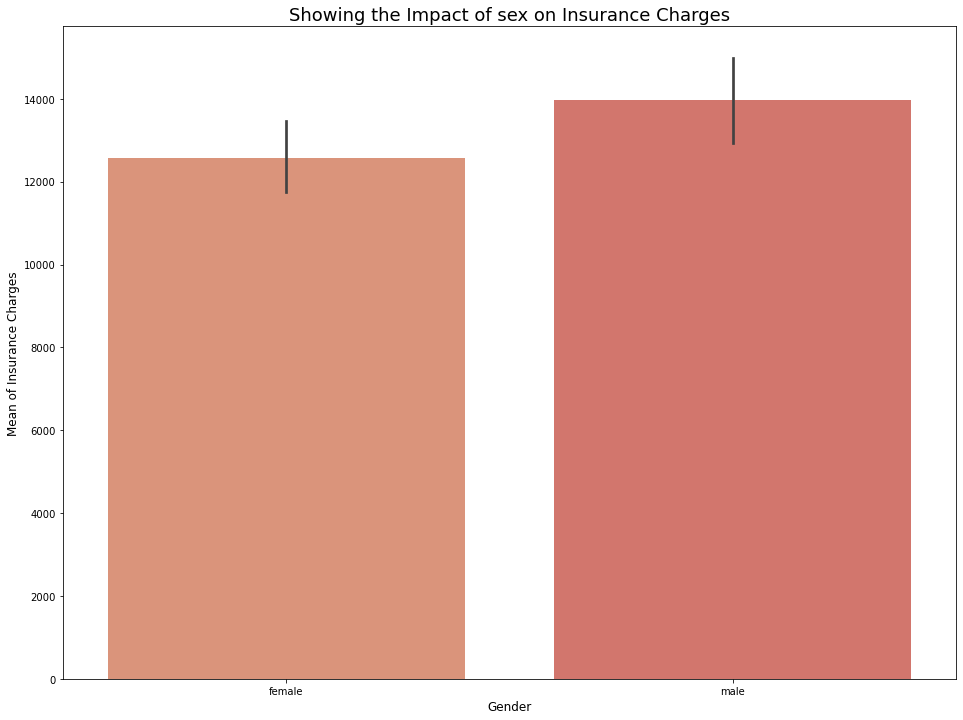

In [190]:
#set the fig size
fig,ax = plt.subplots(figsize = (16,12))

#showing a plot with default mean estimator
ax = sns.barplot(ax = ax ,x ="sex",y = "charges", data =df)

#setting labels
ax.set_xlabel("Gender", size = 12)
ax.set_ylabel("Mean of Insurance Charges", size = 12) 
ax.set_title("Showing the Impact of sex on Insurance Charges", size = 18)





The table and plots shows that males pay more charges than females. Why?

### Research Question 2 

#### How does BMI affect insurance charges?
    - Are people with low BMI charged high or less? or vice-versa?

The documentation reveals that the lower limit for BMI is 18.5 and the upper limit is 24.9
Therefore any BMI value lower than 18.5 is underweight; BMI values higher than 24.9 are obessed victims


In [115]:
# query for bmi values less than 18.5
df_under = df.query("bmi<18.5")
df_under



,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
128,32,female,17.765,2,yes,northwest,32734.18630
172,18,male,15.960,0,no,northeast,1694.79640
198,51,female,18.050,0,no,northwest,9644.25250
232,19,female,17.800,0,no,southwest,1727.78500
250,18,male,17.290,2,yes,northeast,12829.45510
380,27,female,17.955,2,yes,northeast,15006.57945
410,19,male,17.480,0,no,northwest,1621.34020
412,26,female,17.195,2,yes,northeast,14455.64405
428,21,female,16.815,1,no,northeast,3167.45585


In [116]:
#Number of persons that are underweight
df_under.count()


age         20
sex         20
bmi         20
children    20
smoker      20
region      20
charges     20
dtype: int64

In [194]:
fem_under = df_under[df_under["sex"] == "female"]
fem_under.count()

age         12
sex         12
bmi         12
children    12
smoker      12
region      12
charges     12
dtype: int64

In [192]:
#sum of charges for individuals with low BMI
df_under.charges.sum().round(1)

177044.0

In [118]:
df_under.describe()

,age,bmi,children,charges
count,20.000000,20.000000,20.000000,20.000000
mean,32.350000,17.566250,1.050000,8852.200585
std,13.480102,0.608326,1.276302,7735.038364
min,18.000000,15.960000,0.000000,1621.340200
25%,21.000000,17.290000,0.000000,2751.631438
50%,27.500000,17.575000,1.000000,6759.262475
75%,38.250000,17.978750,2.000000,12923.162737
max,60.000000,18.335000,5.000000,32734.186300


In [124]:
df_UnderBmi = df_under.groupby("sex").sum()
df_UnderBmi

,age,bmi,children,charges
sex,,,,
female,413,212.530,15,132150.36065
male,234,138.795,6,44893.65105


Above shows that we have 15 individuals with a low BMI value. We also have 12 underweight females and 8 underweight males. The sum of charges for those with low BMIs = 177044.0 dollars. 

Let's do the same analysis for those a high BMI value(bmi > 24.9)

In [214]:
# query for bmi values greater than 24.9
df_obessed = df.query("bmi>24.9")
df_obessed

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [217]:
#Number of obessed females
obessed_fem = df_obessed[df_obessed["sex"] == "female"]
obessed_fem.count()

age         534
sex         534
bmi         534
children    534
smoker      534
region      534
charges     534
dtype: int64

#### we have 534 obessed females and 561 obessed males

In [209]:
df_obessed.describe()

,age,bmi,children,charges
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,39.849315,32.540658,1.092237,13947.847010
std,14.055783,4.999570,1.197836,12813.536884
min,18.000000,24.970000,0.000000,1131.506600
25%,27.000000,28.595000,0.000000,4904.906575
50%,40.000000,31.900000,1.000000,9563.029000
75%,52.000000,35.807500,2.000000,17654.442975
max,64.000000,53.130000,5.000000,63770.428010


In [210]:
df_obessed.charges.sum().round(1)

15272892.5

In [211]:
df_obessed= df_obessed.groupby("sex").sum()
df_obessed

,age,bmi,children,charges
sex,,,,
female,21492,17278.56,566,6.920573e+06
male,22143,18353.46,630,8.352319e+06


We have a 1095 persons that are in the obessed category

If we closely examine the mean charges of both cases(under weight and obessed), we will see that the charges of those obessed is greater than the charges of those underweight. We can't use the sum of the charges in both cases to judge because it is a not a true representation.

However, this does not clearly answer our research question. We might want to plot to correlation graph to futher expand our analysis.

In [137]:
result = df[["bmi","charges"]]
result

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


Text(0.5, 1.0, 'Relationship Between BMI and Charges')

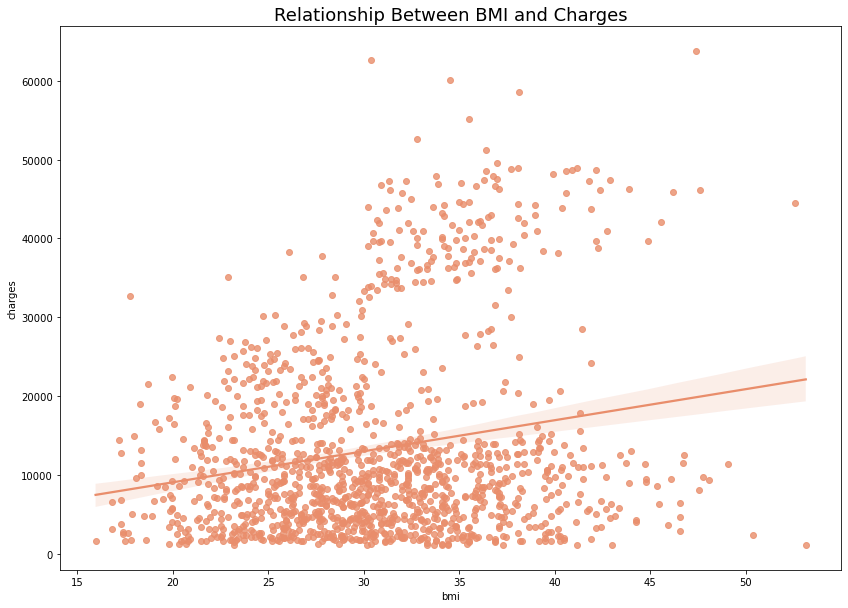

In [155]:
#plotting a regression graph between BMI and charges

fig,ax = plt.subplots(figsize = (14,10))
sns.regplot(ax=ax, x = "bmi", y= "charges", data = result)

ax.set_title("Relationship Between BMI and Charges", size = 18)

There is a correlation between BMI and Charges. However, we can't yet say that an increase in BMI translate to an increase in charges. 

### Research Question 3

#### Are smokers likely to pay more insurance charges?

In [183]:
smoker_df = df[df["smoker"] == "yes"]
smoker_df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [184]:
smoker_df.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [200]:
# number of females that smokes
fem_smoker = smoker_df[smoker_df["sex"]== "female"]
fem_smoker.count()

age         115
sex         115
bmi         115
children    115
smoker      115
region      115
charges     115
dtype: int64

##### we have 115 women and 154 men that smokes

In [171]:
nosmoker_df = df[df["smoker"] == "no"]
nosmoker_df.describe()

,age,bmi,children,charges
count,1063.000000,1063.000000,1063.000000,1063.000000
mean,39.404516,30.651853,1.091251,8440.660307
std,14.076133,6.045956,1.218250,5992.973800
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,3988.883500
50%,40.000000,30.305000,1.000000,7345.726600
75%,52.000000,34.430000,2.000000,11363.019100
max,64.000000,53.130000,5.000000,36910.608030


In [202]:
#number of non-smoking females
femnon_df = nosmoker_df[nosmoker_df["sex"]== "female"]
femnon_df.count()

age         547
sex         547
bmi         547
children    547
smoker      547
region      547
charges     547
dtype: int64

##### we have 544 non-smoking women and 516 non-smoking men

In [177]:
group_smoke = df.groupby("smoker").mean()
group_smoke

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


We can observe that the mean of the charges of those who smoke are more than the charges for those that don't smoke. We can futher show this plot using a barplot and finding the correlation between smokers and insurance charges

Text(0.5, 1.0, 'The Mean of charges for the smoking category')

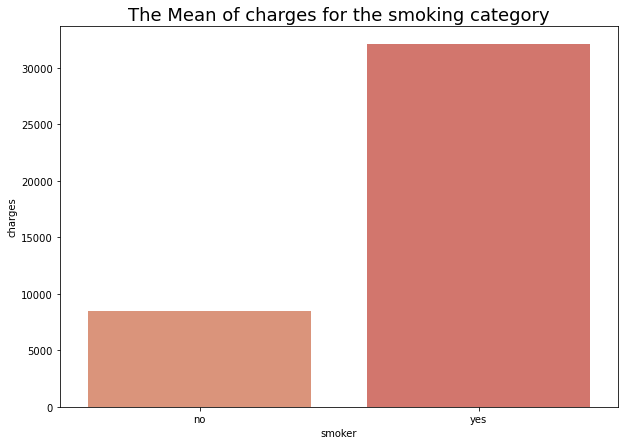

In [182]:
fig, ax = plt.subplots(figsize = (10,7))

# plotting a barplot
sns.barplot(ax = ax, x =  group_smoke.index, y = "charges", data = group_smoke)
ax.set_title("The Mean of charges for the smoking category", size = 18)

Text(0, 0.5, 'Insurance Charges')

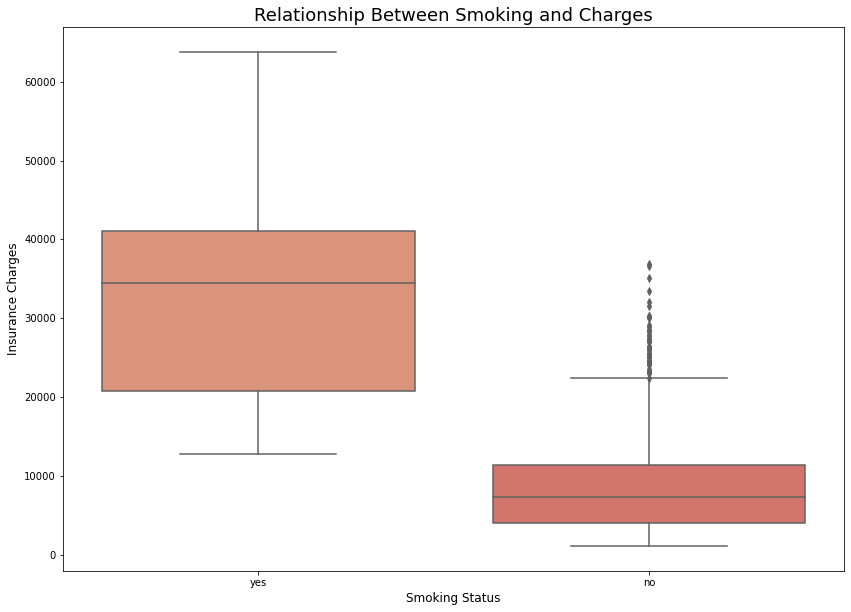

In [188]:
#plotting a boxplot between smoking and charges

fig,ax = plt.subplots(figsize = (14,10))
sns.boxplot(ax=ax, x = "smoker", y= "charges", data = df)

ax.set_title("Relationship Between Smoking and Charges", size = 18)
ax.set_xlabel("Smoking Status", size = 12)
ax.set_ylabel("Insurance Charges", size = 12)

The box plot reveals smokers have pay more charges than those that don't.
Smokers have a lower life expectancy and tend to pay high insurance charges.

<a id='conclusions'></a>
## Findings and Conclusions


### Findings
1. It was observed that females have lesser charges compared to their male counter parts; females also have a lesser number of smokers and lower values for BMI.

2. Those with a higher BMI value tend to pay more insurance charges. We had more males than females in the obessed category females.

3. There is a correlation between those that smoke paying higher charges than those that don't


### Conclusion

The insurance charges increases based on life-expectancy checks. Those who have higher life-expentancy are charged less and those with a lower life- expectancy are charged higher. 

From the analysis, we can see that gender, BMI and Smoking have a relationship with the increase or decrease in insurance charges. This is because these factors detemine life-expectancy. These factors inturn determine the medical costs patients. The higher insurance charge, the higher your medical costs. 